In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
accuracies = read_csv('./data/surrogate_stats_bdd_dashcam.csv')

New names:
* `` -> ...1

Rows: 45 Columns: 5

── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): level_0, object_class, dataset
dbl (2): ...1, AP


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
ratio = filter(accuracies, level_0 == 'ratio')

In [26]:
library(repr)
## set figure size
f = 2
width=3*f
height=1.5*f
options(repr.plot.width=width, repr.plot.height=height)

In [27]:
#factor(dataset, levels=c('dashcam', 'bdd'))
pt = (ggplot(ratio, aes(y=AP, x=factor(object_class), 
                             #fill=factor(object_class), 
                             fill_alpha=.6))
        + geom_bar(stat='identity', position='dodge')
#         + geom_hline(mapping=aes(yintercept=1.,), linetype='dashed')
        + facet_grid(cols=vars(dataset), scales='free', labeller='label_both')
        + scale_y_log10()
        + ylab(label = 'proxy AP / random AP')
        + xlab(element_blank())
        + labs(title = 'Proxy model average precision (AP) vs random AP')
        + theme(plot.title=element_text(hjust = .5, size=15),
                legend.title=element_blank(),
                legend.position='top',
                strip.text=element_text(size=14),
                legend.margin=margin(t=0, b=0),
                legend.box.margin=margin(0,0,0,0),
                axis.text.y=element_text(size=12),
                axis.title=element_text(size=14),
                axis.text.x=element_text(size=14, angle=90, hjust = 1, vjust=.5),
                legend.text=element_text(size=14))
     )

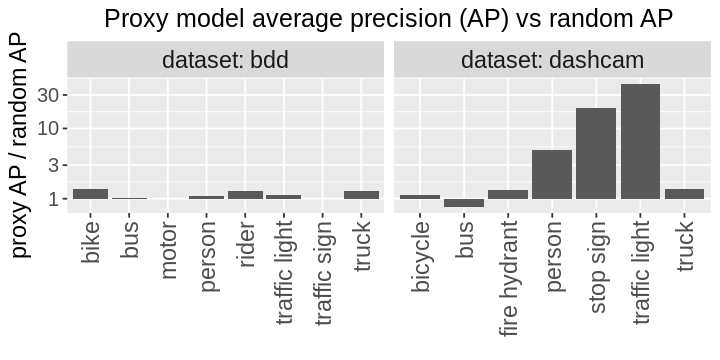

In [28]:
pt

In [30]:
ggsave(file='./assets/precision_compared.pdf', plot=pt, units='in', width=width, height = height)